In [1]:
from __future__ import print_function, division
import geopandas as gp
from shapely.geometry import Point
import pandas as pd
import os
import json
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUIDATA')

'/home/cusp/sk6176/PUIdata'

In [10]:
!wget https://data.cityofnewyork.us/resource/24t3-xqyv.csv
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip

--2017-11-14 15:35:45--  https://data.cityofnewyork.us/resource/24t3-xqyv.csv
Resolving data.cityofnewyork.us... 52.206.140.205
Connecting to data.cityofnewyork.us|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: “24t3-xqyv.csv”

    [ <=>                                   ] 482,005     2.75M/s   in 0.2s    

2017-11-14 15:35:46 (2.75 MB/s) - “24t3-xqyv.csv” saved [482005]

--2017-11-14 15:35:46--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip
Resolving www1.nyc.gov... 23.205.21.144, 2600:141b:13:297::1500, 2600:141b:13:292::1500
Connecting to www1.nyc.gov|23.205.21.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9857321 (9.4M) [application/zip]
Saving to: “mn_mappluto_16v2.zip”

100%[======================================>] 9,857,321   13.8M/s   in 0.7s    

2017-11-14 15:35:47 (13.8 MB/s) - “mn_mappluto_16v2.zip” saved [9857321/9857321]


In [12]:
os.system("mv %s %s "%("24t3-xqyv.csv", os.getenv("PUIDATA")))
os.system("mv %s %s "%("mn_mappluto_16v2.zip", os.getenv("PUIDATA")))
!unzip mn_mappluto_16v2.zip -d $PUIDATA

unzip:  cannot find or open mn_mappluto_16v2.zip, mn_mappluto_16v2.zip.zip or mn_mappluto_16v2.zip.ZIP.


In [13]:
WIFI = pd.read_csv(os.getenv('PUIDATA') + '/24t3-xqyv.csv')

In [14]:
WIFI.head()

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,activated,bbl,bctcb2010,bin,borocd,...,ntaname,objectid,provider,remarks,sourceid,ssid,type,x,y,zip
0,10,11722.0,11,7,4,2017-01-18T00:00:00.000,0.000000e+00,1009500.0,0.0,105.0,...,Midtown-Midtown South,998,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-008695,LinkNYC Free Wi-Fi,Free,985901.695307,211053.130644,10001
1,50,12078.0,11,8,4,2017-06-21T00:00:00.000,1.008590e+09,1007400.0,1016929.0,105.0,...,Midtown-Midtown South,999,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-014013,LinkNYC Free Wi-Fi,Free,988387.309473,210559.946684,10016
2,10,13094.0,11,8,4,NaN,1.010160e+09,1011900.0,1024714.0,105.0,...,Midtown-Midtown South,1000,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-007083,LinkNYC Free Wi-Fi,Free,988162.256449,215315.021263,10036
3,51,12081.0,11,10,4,2016-11-10T00:00:00.000,1.010200e+09,1012500.0,1076195.0,105.0,...,Midtown-Midtown South,1001,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-003309,LinkNYC Free Wi-Fi,Free,988587.757617,216155.033448,10036
4,51,12081.0,11,10,4,2016-07-18T00:00:00.000,1.010208e+09,1012500.0,1087187.0,105.0,...,Midtown-Midtown South,1002,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-000162,LinkNYC Free Wi-Fi,Free,988532.655360,216316.036881,10019


In [15]:
WIFI = WIFI.iloc[:,5:]
WIFI.head()

,activated,bbl,bctcb2010,bin,borocd,borocode,boroname,borough,city,coundist,...,ntaname,objectid,provider,remarks,sourceid,ssid,type,x,y,zip
0,2017-01-18T00:00:00.000,0.000000e+00,1009500.0,0.0,105.0,1,Manhattan,MN,New York,3.0,...,Midtown-Midtown South,998,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-008695,LinkNYC Free Wi-Fi,Free,985901.695307,211053.130644,10001
1,2017-06-21T00:00:00.000,1.008590e+09,1007400.0,1016929.0,105.0,1,Manhattan,MN,New York,2.0,...,Midtown-Midtown South,999,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-014013,LinkNYC Free Wi-Fi,Free,988387.309473,210559.946684,10016
2,NaN,1.010160e+09,1011900.0,1024714.0,105.0,1,Manhattan,MN,New York,3.0,...,Midtown-Midtown South,1000,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-007083,LinkNYC Free Wi-Fi,Free,988162.256449,215315.021263,10036
3,2016-11-10T00:00:00.000,1.010200e+09,1012500.0,1076195.0,105.0,1,Manhattan,MN,New York,4.0,...,Midtown-Midtown South,1001,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-003309,LinkNYC Free Wi-Fi,Free,988587.757617,216155.033448,10036
4,2016-07-18T00:00:00.000,1.010208e+09,1012500.0,1087187.0,105.0,1,Manhattan,MN,New York,4.0,...,Midtown-Midtown South,1002,LinkNYC - Citybridge,"Tablet Internet -phone , Free 1 GB Wi-FI Service",LINK-000162,LinkNYC Free Wi-Fi,Free,988532.655360,216316.036881,10019


#### Reading the Manhattan PLUTO shape file

In [16]:
MN = gp.read_file(os.getenv('PUIDATA') + '/MNMapPLUTO.shp')

#### merge Manhattan shapefile on WIFI so only Manhattan WIFI data will remain

In [17]:
WIFI = WIFI.merge(MN, left_on = 'bbl', right_on = 'BBL')

#### Making the WIFI to shape file so geopand can plot it

In [18]:
geometry = [Point(x) for x in zip(WIFI.x, WIFI.y)]

crs = {'init': 'epsg:4326'}
WIFI_shp = gp.GeoDataFrame(WIFI, crs=crs, geometry=geometry) 
WIFI_shp.head(3)

,activated,bbl,bctcb2010,bin,borocd,borocode,boroname,borough,city,coundist,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,2017-06-21T00:00:00.000,1.008590e+09,1007400.0,1016929.0,105.0,1,Manhattan,MN,New York,2.0,...,10306,None,0.000000e+00,None,1,16V2,0,362.997794,8105.160878,POINT (988387.309473 210559.946684)
1,NaN,1.010160e+09,1011900.0,1024714.0,105.0,1,Manhattan,MN,New York,3.0,...,10402,None,0.000000e+00,None,1,16V2,0,1091.416748,70203.037311,POINT (988162.256449 215315.021263)
2,2016-11-10T00:00:00.000,1.010200e+09,1012500.0,1076195.0,105.0,1,Manhattan,MN,New York,4.0,...,10402,None,1.010200e+09,12/10/1987,1,16V2,0,792.487735,38996.547969,POINT (988587.757617 216155.033448)


#### Let's plot the Hot Spot location map on NYC mahattan base map

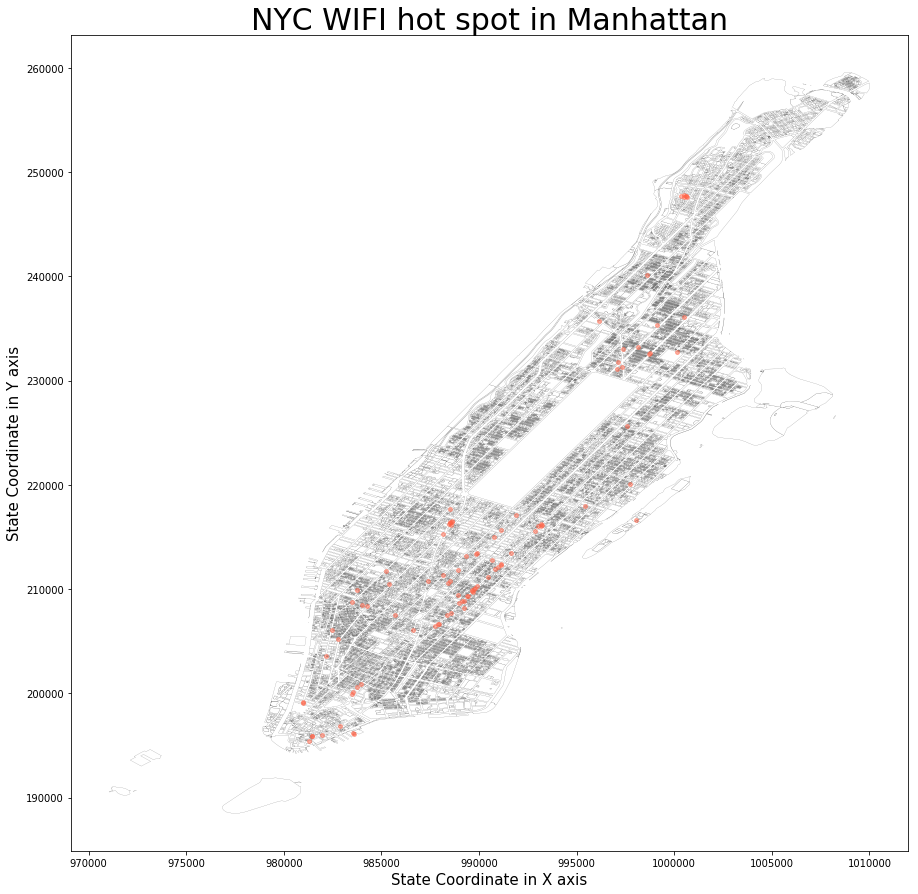

In [19]:
f, ax = plt.subplots(figsize=(15,15))
# f.suptitle('NYC WIFI hot spot in Manhattan')
base = MN.plot(color='white', edgecolor='black', linewidth = 0.1 ,ax =ax)
WIFI_shp.plot( markersize=15, color = 'tomato', alpha = 0.5, ax = ax)
ax.set_xlabel('State Coordinate in X axis' , fontsize = 15)
ax.set_ylabel('State Coordinate in Y axis', fontsize = 15)
ax.set_title('NYC WIFI hot spot in Manhattan', fontsize = 30)

#### Fig.1 The tomato color dot shows each WIFI location, more darker means there are more than one WIFI location 